In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib, matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rowdata_df = pd.read_csv("../pharmacy_tx.csv")

In [3]:
print(rowdata_df.shape)
rowdata_df.head(10)

(13910244, 9)


,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00
5,2022-01-02,Pharmacy #19,K32.86,branded lalol,96934,S76J7V6,NaN,False,13.93
6,2022-01-02,Pharmacy #19,U60.52,branded foxivelule,725700,327CKV,IOEAN1DWVV3Y,False,11.15
7,2022-01-02,Pharmacy #27,U27.71,generic foxivelule,539437,NaN,1CAHL,False,7.27
8,2022-01-02,Pharmacy #48,K32.86,generic tafistitrisin,322463,NaN,HO8HUGL,False,6.01
9,2022-01-02,Pharmacy #28,I68.27,branded prazinib,664344,CS8580,NaN,False,11.74


In [4]:
rowdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910244 entries, 0 to 13910243
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   tx_date      object 
 1   pharmacy     object 
 2   diagnosis    object 
 3   drug         object 
 4   bin          int64  
 5   pcn          object 
 6   group        object 
 7   rejected     bool   
 8   patient_pay  float64
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 862.3+ MB


In [5]:
#rowdata_dropna_df=rowdata_df.dropna()
print(rowdata_df.shape)

(13910244, 9)


In [6]:
duplicate = rowdata_df[rowdata_df.duplicated(["pharmacy","bin"])]

In [7]:
duplicate.head(6)
print(duplicate.shape)

(13909548, 9)


In [8]:
# drop duplicates if all columns matched
dropduplicate_df= rowdata_df.drop_duplicates()

In [9]:
dropduplicate_df

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00
...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93


In [10]:
dropduplicate_df.groupby(["rejected"]).count()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,patient_pay
rejected,,,,,,,,
False,11512008,11512008,11512008,11512008,11512008,8581198,8268435,11512008
True,1049837,1049837,1049837,1049837,1049837,757422,769773,1049837


In [11]:
# drop the rejected claims
#df_filtered = dropduplicate_df[dropduplicate_df['rejected'] == False]

In [12]:
dropduplicate_df[['brand', 'drug_name']] =dropduplicate_df.drug.str.split(expand=True)

/Users/dilhumarablat/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [13]:
dropduplicate_df.drop(["drug"], axis =1, inplace =True)

/Users/dilhumarablat/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
dropduplicate_df.head()
print(dropduplicate_df.shape)

(12561845, 10)


In [15]:
dropduplicate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12561845 entries, 0 to 13910243
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   tx_date      object 
 1   pharmacy     object 
 2   diagnosis    object 
 3   bin          int64  
 4   pcn          object 
 5   group        object 
 6   rejected     bool   
 7   patient_pay  float64
 8   brand        object 
 9   drug_name    object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 970.4+ MB


In [16]:
# removing the claims in Janurary
NoJan_df = dropduplicate_df[dropduplicate_df['tx_date'] >= "2022-02-01"]

In [17]:
print(NoJan_df.shape)
NoJan_df.head()

(11629192, 10)


,tx_date,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name
1019813,2022-02-01,Pharmacy #54,G51.87,691847,XH4T3,GOM8K0,False,10.72,generic,prazinib
1019814,2022-02-01,Pharmacy #7,K32.86,322463,3Y5ZW0,NaN,False,18.16,branded,tanoclolol
1019815,2022-02-01,Pharmacy #42,G99.93,691847,2TIC,XK8RM5E75ZW,False,8.73,generic,simarol
1019816,2022-02-01,Pharmacy #24,D13.25,160389,RB7UU,RS5RB3YA,False,72.22,branded,plazamiglutic
1019817,2022-02-01,Pharmacy #12,U60.52,322463,3O71UTS,NaN,False,12.22,generic,oxasoted


In [18]:
NoJan_df.columns.tolist()

['tx_date',
 'pharmacy',
 'diagnosis',
 'bin',
 'pcn',
 'group',
 'rejected',
 'patient_pay',
 'brand',
 'drug_name']

In [19]:
# getting columns contains strings
df_str_columns=NoJan_df.select_dtypes(include=['object'])
for col in df_str_columns.columns:
    print(col)

tx_date
pharmacy
diagnosis
pcn
group
brand
drug_name


In [20]:
# Initial imports
from collections import Counter
from pathlib import Path
import plotly.express as px
# Import dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from seaborn import set_style
set_style("whitegrid")

In [21]:
df_pharmacy=NoJan_df.groupby(["pharmacy"]).count()
pharmacy=df_pharmacy.reset_index()

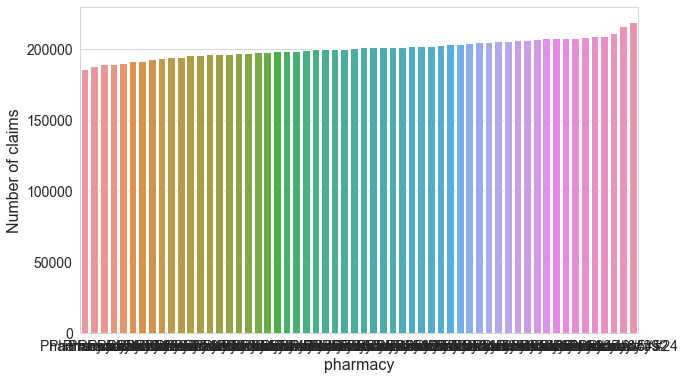

In [22]:
## bar plot for pharmacy claims 
plt.figure(figsize=(10,6))
pharmacy_sorted = pharmacy.sort_values('tx_date')
sns.barplot(data = pharmacy_sorted,
               y = 'tx_date',
               x = 'pharmacy')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel('Number of claims', fontsize=16)
plt.xlabel('pharmacy', fontsize=16)

plt.show()

In [23]:
pcn=NoJan_df.groupby(["pcn"]).count()
pcn=pcn.reset_index()
pcn

,pcn,tx_date,pharmacy,diagnosis,bin,group,rejected,patient_pay,brand,drug_name
0,1UQC,545323,545323,545323,545323,0,545323,545323,545323,545323
1,2TIC,91876,91876,91876,91876,91876,91876,91876,91876,91876
2,327CKV,828881,828881,828881,828881,828881,828881,828881,828881,828881
3,393U,26449,26449,26449,26449,26449,26449,26449,26449,26449
4,3O71UTS,553824,553824,553824,553824,0,553824,553824,553824,553824
5,3Y5ZW0,113573,113573,113573,113573,0,113573,113573,113573,113573
6,6ZGS97C,94224,94224,94224,94224,0,94224,94224,94224,94224
7,7THOQ5,154760,154760,154760,154760,0,154760,154760,154760,154760
8,9C5MOR3,89998,89998,89998,89998,89998,89998,89998,89998,89998
9,9D24,84470,84470,84470,84470,84470,84470,84470,84470,84470


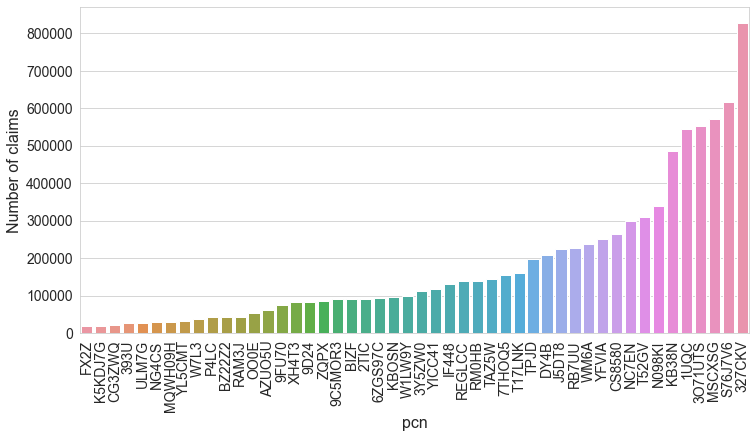

In [24]:
## bar plot for pharmacy claims 
plt.figure(figsize=(12,6))
pcn_sorted = pcn.sort_values('tx_date')
sns.barplot(data = pcn_sorted,
               y = 'tx_date',
               x = 'pcn')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel('Number of claims', fontsize=16)
plt.xlabel('pcn', fontsize=16)
plt.xticks(rotation = 90)


plt.show()

In [25]:
group=NoJan_df.groupby(["group"]).count()
group=group.reset_index()
group.head()

,group,tx_date,pharmacy,diagnosis,bin,pcn,rejected,patient_pay,brand,drug_name
0,0OGKQ,100058,100058,100058,100058,100058,100058,100058,100058,100058
1,0TZ9XYJZJH,68460,68460,68460,68460,0,68460,68460,68460,68460
2,1CAHL,371065,371065,371065,371065,0,371065,371065,371065,371065
3,1N5IRQ,19309,19309,19309,19309,19309,19309,19309,19309,19309
4,52H8KH0F83K,421897,421897,421897,421897,0,421897,421897,421897,421897


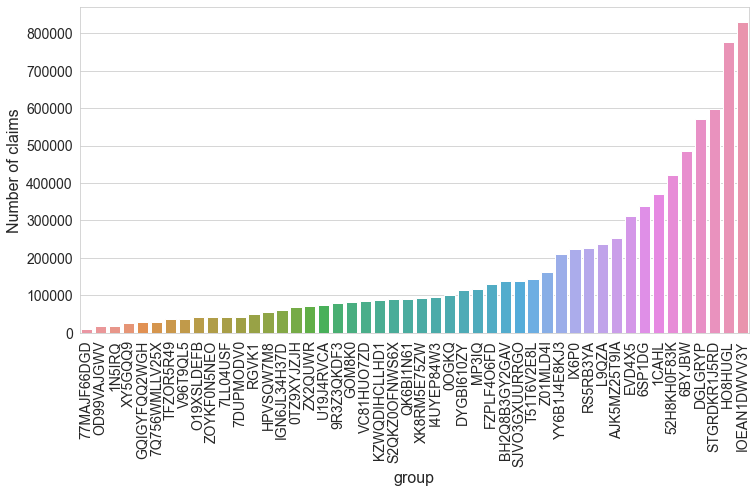

In [26]:
## bar plot for pharmacy claims 
plt.figure(figsize=(12,6))
group_sorted = group.sort_values('tx_date')
sns.barplot(data = group_sorted,
               y = 'tx_date',
               x = 'group')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel('Number of claims', fontsize=16)
plt.xlabel('group', fontsize=16)
plt.xticks(rotation = 90)



plt.show()

In [27]:
# using lableEncoder to assign brand and rejected into numerical values 
le = LabelEncoder()
NoJan_df1 = NoJan_df.copy()
NoJan_df1['brand'] = le.fit_transform(NoJan_df1['brand'])
NoJan_df1['rejected'] = le.fit_transform(NoJan_df1['rejected'])

In [31]:
NoJan_df1.head()

,tx_date,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name
1019813,2022-02-01,Pharmacy #54,G51.87,691847,XH4T3,GOM8K0,0,10.72,1,prazinib
1019814,2022-02-01,Pharmacy #7,K32.86,322463,3Y5ZW0,NaN,0,18.16,0,tanoclolol
1019815,2022-02-01,Pharmacy #42,G99.93,691847,2TIC,XK8RM5E75ZW,0,8.73,1,simarol
1019816,2022-02-01,Pharmacy #24,D13.25,160389,RB7UU,RS5RB3YA,0,72.22,0,plazamiglutic
1019817,2022-02-01,Pharmacy #12,U60.52,322463,3O71UTS,NaN,0,12.22,1,oxasoted


In [32]:
# Create our features and get dummies
X = pd.get_dummies(NoJan_df1, columns= ["pharmacy", "diagnosis", "pcn","group", 
                                 "drug_name"]).drop(["rejected","tx_date", "patient_pay"],axis=1)

# Create our target
y = NoJan_df1['rejected']
X.head()

,bin,brand,pharmacy_Pharmacy #0,pharmacy_Pharmacy #1,pharmacy_Pharmacy #10,pharmacy_Pharmacy #11,pharmacy_Pharmacy #12,pharmacy_Pharmacy #13,pharmacy_Pharmacy #14,pharmacy_Pharmacy #15,...,drug_name_tanoclolol,drug_name_thiostasteglume,drug_name_tocilic,drug_name_tocrocin,drug_name_todiadianic,drug_name_tovane,drug_name_tricatripride,drug_name_tugesutin,drug_name_vivafastat,drug_name_vocopirin
1019813,691847,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019814,322463,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1019815,691847,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019816,160389,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019817,322463,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
NoJan_df1

,tx_date,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name
1019813,2022-02-01,Pharmacy #54,G51.87,691847,XH4T3,GOM8K0,0,10.72,1,prazinib
1019814,2022-02-01,Pharmacy #7,K32.86,322463,3Y5ZW0,NaN,0,18.16,0,tanoclolol
1019815,2022-02-01,Pharmacy #42,G99.93,691847,2TIC,XK8RM5E75ZW,0,8.73,1,simarol
1019816,2022-02-01,Pharmacy #24,D13.25,160389,RB7UU,RS5RB3YA,0,72.22,0,plazamiglutic
1019817,2022-02-01,Pharmacy #12,U60.52,322463,3O71UTS,NaN,0,12.22,1,oxasoted
...,...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,322463,NaN,HO8HUGL,1,0.00,0,colifunene
13910240,2022-12-30,Pharmacy #45,N59.44,664344,NaN,TFZOR5R49,0,6.28,1,tafistitrisin
13910241,2022-12-30,Pharmacy #54,W50.87,691847,N098KI,6SP1DG,0,6.94,1,tanoclolol
13910242,2022-12-30,Pharmacy #0,I68.27,96934,S76J7V6,NaN,0,13.93,0,prazinib


In [34]:
NoJan_df1.describe()

,bin,rejected,patient_pay,brand
count,1.162919e+07,1.162919e+07,1.162919e+07,1.162919e+07
mean,5.756403e+05,8.365620e-02,2.440255e+01,3.691248e-01
std,2.037136e+05,2.768715e-01,4.051599e+01,4.825678e-01
min,9.693400e+04,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.224630e+05,0.000000e+00,8.510000e+00,0.000000e+00
50%,6.643440e+05,0.000000e+00,1.339000e+01,0.000000e+00
75%,7.183500e+05,0.000000e+00,1.891000e+01,1.000000e+00
max,9.569710e+05,1.000000e+00,5.579300e+02,1.000000e+00


In [35]:
# Check the balance of our target values
y.value_counts()

0    10656338
1      972854
Name: rejected, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  train_size=0.10)

In [37]:
# Check balances
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 1065926, 1: 96993})
Counter({0: 9590412, 1: 875861})


In [38]:
# Resample the training data with the BalancedRandomForestClassifier
# get time for execustion
from datetime import datetime
start_time = datetime.now()

from imblearn.ensemble import BalancedRandomForestClassifier
BalancedRFC_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
BalancedRFC_model= BalancedRFC_model.fit(X_train, y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:01:56.603393


In [39]:
# Calculated the balanced accuracy score
y_pred = BalancedRFC_model.predict(X_test)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.872313149504292

In [40]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [41]:
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,7306920,2283492
Actual 1,15128,860733


In [42]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.76      0.98      0.86      0.87      0.73   9590412
          1       0.27      0.98      0.76      0.43      0.87      0.77    875861

avg / total       0.94      0.78      0.96      0.83      0.87      0.73  10466273



In [43]:
# List the features 
features = BalancedRFC_model.feature_importances_
features

array([2.32689140e-02, 1.60026296e-01, 3.13865214e-03, 3.24561022e-03,
       3.19112069e-03, 3.26317046e-03, 3.18707895e-03, 3.00195139e-03,
       3.24334669e-03, 3.30670555e-03, 3.28241347e-03, 3.25193514e-03,
       3.12205027e-03, 3.29739003e-03, 3.09785459e-03, 3.13005560e-03,
       2.90722231e-03, 3.10301569e-03, 3.11120290e-03, 3.23781979e-03,
       3.11459694e-03, 3.12203352e-03, 3.14191477e-03, 3.24729984e-03,
       3.25396100e-03, 3.11471103e-03, 3.23172234e-03, 3.14183483e-03,
       2.99414772e-03, 3.19645528e-03, 3.01466936e-03, 3.16844382e-03,
       3.19174456e-03, 3.14277229e-03, 2.94344084e-03, 3.34414103e-03,
       3.15771382e-03, 3.17882122e-03, 3.04579004e-03, 3.17309827e-03,
       3.08671672e-03, 3.37842313e-03, 3.24206488e-03, 3.23239041e-03,
       3.17666263e-03, 3.19043817e-03, 3.15455027e-03, 3.28454480e-03,
       3.15705209e-03, 3.13747185e-03, 3.28466376e-03, 3.24614165e-03,
       3.11888498e-03, 3.21439096e-03, 3.02473106e-03, 2.99652839e-03,
      

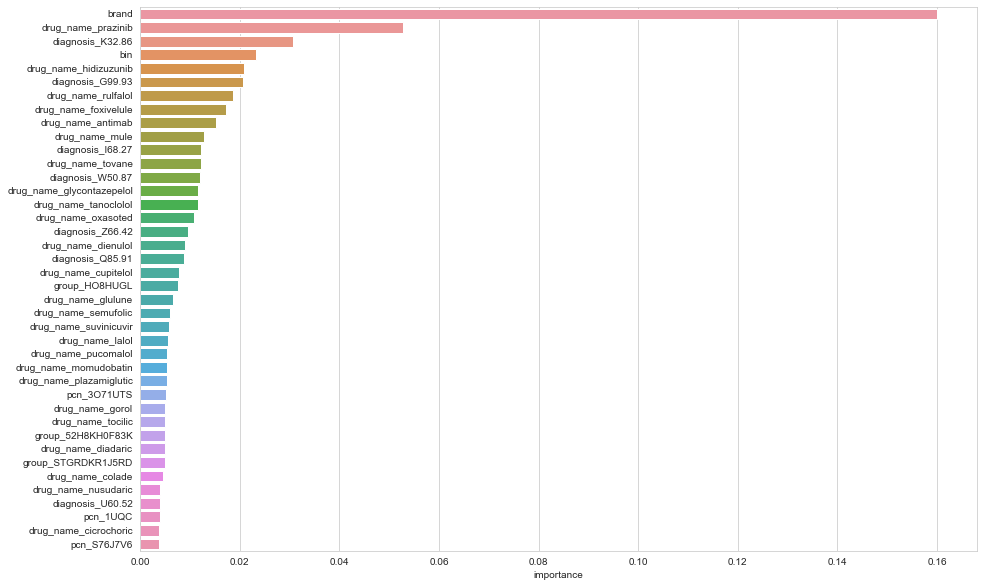

<Figure size 432x288 with 0 Axes>

In [44]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = BalancedRFC_model.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:40]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()
plt.savefig("featureimportance.png") #save as png

In [42]:
NoJan_df1['log_patient_pay'] = np.log10(NoJan_df1['patient_pay'])

/Users/dilhumarablat/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [43]:
NoJan_df1.groupby(["log_patient_pay"]).count()

,tx_date,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name
log_patient_pay,,,,,,,,,,
-inf,972854,972854,972854,972854,701839,713537,972854,972854,972854,972854
0.531479,1844,1844,1844,1844,1844,0,1844,1844,1844,1844
0.537819,17319,17319,17319,17319,1614,17319,17319,17319,17319,17319
0.540329,7439,7439,7439,7439,7439,7439,7439,7439,7439,7439
0.544068,10454,10454,10454,10454,1831,10454,10454,10454,10454,10454
...,...,...,...,...,...,...,...,...,...,...
2.746424,7,7,7,7,7,7,7,7,7,7
2.746479,6,6,6,6,6,6,6,6,6,6
2.746486,15,15,15,15,15,15,15,15,15,15


In [44]:
NoJan_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11629192 entries, 1019813 to 13910243
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   tx_date          object 
 1   pharmacy         object 
 2   diagnosis        object 
 3   bin              int64  
 4   pcn              object 
 5   group            object 
 6   rejected         int64  
 7   patient_pay      float64
 8   brand            int64  
 9   drug_name        object 
 10  log_patient_pay  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 1.0+ GB


In [45]:
NoJan_df1['log_patient_pay']=NoJan_df1['log_patient_pay'].astype(str)

In [46]:
df_filtered = NoJan_df1[NoJan_df1['log_patient_pay'] != "-inf"]

In [47]:
df_filtered 

,tx_date,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name,log_patient_pay
1019813,2022-02-01,Pharmacy #54,G51.87,691847,XH4T3,GOM8K0,0,10.72,1,prazinib,1.0301947853567512
1019814,2022-02-01,Pharmacy #7,K32.86,322463,3Y5ZW0,NaN,0,18.16,0,tanoclolol,1.2591158441850663
1019815,2022-02-01,Pharmacy #42,G99.93,691847,2TIC,XK8RM5E75ZW,0,8.73,1,simarol,0.9410142437055697
1019816,2022-02-01,Pharmacy #24,D13.25,160389,RB7UU,RS5RB3YA,0,72.22,0,plazamiglutic,1.8586574840908079
1019817,2022-02-01,Pharmacy #12,U60.52,322463,3O71UTS,NaN,0,12.22,1,oxasoted,1.0870712059065355
...,...,...,...,...,...,...,...,...,...,...,...
13910238,2022-12-30,Pharmacy #39,Q72.66,571569,KB38N,6BYJBW,0,66.47,0,momudobatin,1.8226256787741408
13910240,2022-12-30,Pharmacy #45,N59.44,664344,NaN,TFZOR5R49,0,6.28,1,tafistitrisin,0.7979596437371962
13910241,2022-12-30,Pharmacy #54,W50.87,691847,N098KI,6SP1DG,0,6.94,1,tanoclolol,0.8413594704548549
13910242,2022-12-30,Pharmacy #0,I68.27,96934,S76J7V6,NaN,0,13.93,0,prazinib,1.1439511164239635


In [48]:
df_filtered.groupby(["log_patient_pay"]).count()

,tx_date,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name
log_patient_pay,,,,,,,,,,
0.5314789170422551,1844,1844,1844,1844,1844,0,1844,1844,1844,1844
0.5378190950732742,17319,17319,17319,17319,1614,17319,17319,17319,17319,17319
0.5403294747908738,7439,7439,7439,7439,7439,7439,7439,7439,7439,7439
0.5440680443502757,10454,10454,10454,10454,1831,10454,10454,10454,10454,10454
0.6020599913279624,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531
...,...,...,...,...,...,...,...,...,...,...
2.7464240055890037,7,7,7,7,7,7,7,7,7,7
2.746478509930031,6,6,6,6,6,6,6,6,6,6
2.7464862957060983,15,15,15,15,15,15,15,15,15,15


In [51]:
df_filtered['log_patient_pay']=df_filtered['log_patient_pay'].astype(float).round(1)

/Users/dilhumarablat/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df_filtered.groupby(["log_patient_pay"]).count()

,tx_date,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name
log_patient_pay,,,,,,,,,,
0.5,37056,37056,37056,37056,12728,35212,37056,37056,37056,37056
0.6,38933,38933,38933,38933,16619,37100,38933,38933,38933,38933
0.7,246902,246902,246902,246902,128321,211026,246902,246902,246902,246902
0.8,1097322,1097322,1097322,1097322,711559,868651,1097322,1097322,1097322,1097322
0.9,623635,623635,623635,623635,454806,414183,623635,623635,623635,623635
1.0,1838466,1838466,1838466,1838466,1230310,1526050,1838466,1838466,1838466,1838466
1.1,1471248,1471248,1471248,1471248,1255124,739378,1471248,1471248,1471248,1471248
1.2,1853336,1853336,1853336,1853336,1358923,1570906,1853336,1853336,1853336,1853336
1.3,1208861,1208861,1208861,1208861,974218,744035,1208861,1208861,1208861,1208861


<AxesSubplot:ylabel='Frequency'>

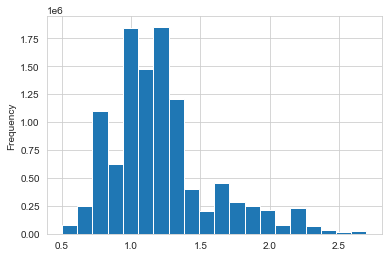

In [53]:
df_filtered["log_patient_pay"].plot.hist(bins =20)

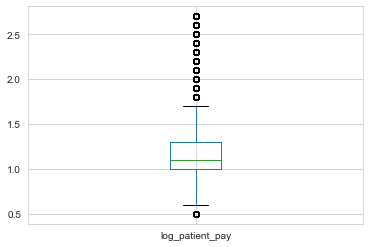

In [54]:
boxplot =df_filtered.boxplot(column=['log_patient_pay'])  

In [55]:
df_filtered1 =df_filtered.copy()

In [56]:
df_filtered1['log_patient_pay']=df_filtered1['log_patient_pay'].astype(float).round(2)

[Text(0, 0, '322891'),
 Text(0, 0, '1.72096e+06'),
 Text(0, 0, '3.30971e+06'),
 Text(0, 0, '3.0622e+06'),
 Text(0, 0, '597199'),
 Text(0, 0, '735106'),
 Text(0, 0, '464479'),
 Text(0, 0, '306722'),
 Text(0, 0, '103370'),
 Text(0, 0, '33703')]

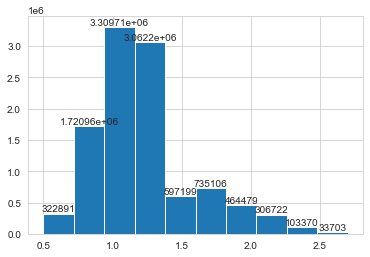

In [57]:
data =df_filtered1[["log_patient_pay"]]
counts, edges, bars = plt.hist(data)
#              ^

plt.bar_label(bars)

In [58]:
df_filtered1.loc[df_filtered1["patient_pay"]<=10]

,tx_date,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name,log_patient_pay
1019815,2022-02-01,Pharmacy #42,G99.93,691847,2TIC,XK8RM5E75ZW,0,8.73,1,simarol,0.9
1019819,2022-02-01,Pharmacy #37,Y11.84,691847,NC7EN,NaN,0,9.49,1,tovane,1.0
1019822,2022-02-01,Pharmacy #50,K32.86,664344,NaN,52H8KH0F83K,0,6.74,0,tanoclolol,0.8
1019823,2022-02-01,Pharmacy #30,K32.86,322463,T52GV,EVD4X5,0,8.97,1,pucomalol,1.0
1019824,2022-02-01,Pharmacy #52,G99.93,322463,NaN,HO8HUGL,0,4.58,1,rulfalol,0.7
...,...,...,...,...,...,...,...,...,...,...,...
13910231,2022-12-30,Pharmacy #5,K32.86,664344,BIZF,QK6BI1N61,0,6.36,1,tanoclolol,0.8
13910233,2022-12-30,Pharmacy #12,G99.93,160389,RB7UU,RS5RB3YA,0,5.32,1,rulfalol,0.7
13910234,2022-12-30,Pharmacy #54,T57.97,664344,NaN,STGRDKR1J5RD,0,5.95,1,foxivelule,0.8
13910240,2022-12-30,Pharmacy #45,N59.44,664344,NaN,TFZOR5R49,0,6.28,1,tafistitrisin,0.8


In [59]:
df_filtered1.loc[df_filtered1["patient_pay"]<=20]

,tx_date,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name,log_patient_pay
1019813,2022-02-01,Pharmacy #54,G51.87,691847,XH4T3,GOM8K0,0,10.72,1,prazinib,1.0
1019814,2022-02-01,Pharmacy #7,K32.86,322463,3Y5ZW0,NaN,0,18.16,0,tanoclolol,1.3
1019815,2022-02-01,Pharmacy #42,G99.93,691847,2TIC,XK8RM5E75ZW,0,8.73,1,simarol,0.9
1019817,2022-02-01,Pharmacy #12,U60.52,322463,3O71UTS,NaN,0,12.22,1,oxasoted,1.1
1019818,2022-02-01,Pharmacy #11,Q85.91,664344,TPJD,NaN,0,19.82,0,glycontazepelol,1.3
...,...,...,...,...,...,...,...,...,...,...,...
13910237,2022-12-30,Pharmacy #42,U61.13,664344,TPJD,NaN,0,19.22,1,ratin,1.3
13910240,2022-12-30,Pharmacy #45,N59.44,664344,NaN,TFZOR5R49,0,6.28,1,tafistitrisin,0.8
13910241,2022-12-30,Pharmacy #54,W50.87,691847,N098KI,6SP1DG,0,6.94,1,tanoclolol,0.8
13910242,2022-12-30,Pharmacy #0,I68.27,96934,S76J7V6,NaN,0,13.93,0,prazinib,1.1


In [60]:
df_filtered1.loc[df_filtered1["patient_pay"]<=30]

,tx_date,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name,log_patient_pay
1019813,2022-02-01,Pharmacy #54,G51.87,691847,XH4T3,GOM8K0,0,10.72,1,prazinib,1.0
1019814,2022-02-01,Pharmacy #7,K32.86,322463,3Y5ZW0,NaN,0,18.16,0,tanoclolol,1.3
1019815,2022-02-01,Pharmacy #42,G99.93,691847,2TIC,XK8RM5E75ZW,0,8.73,1,simarol,0.9
1019817,2022-02-01,Pharmacy #12,U60.52,322463,3O71UTS,NaN,0,12.22,1,oxasoted,1.1
1019818,2022-02-01,Pharmacy #11,Q85.91,664344,TPJD,NaN,0,19.82,0,glycontazepelol,1.3
...,...,...,...,...,...,...,...,...,...,...,...
13910237,2022-12-30,Pharmacy #42,U61.13,664344,TPJD,NaN,0,19.22,1,ratin,1.3
13910240,2022-12-30,Pharmacy #45,N59.44,664344,NaN,TFZOR5R49,0,6.28,1,tafistitrisin,0.8
13910241,2022-12-30,Pharmacy #54,W50.87,691847,N098KI,6SP1DG,0,6.94,1,tanoclolol,0.8
13910242,2022-12-30,Pharmacy #0,I68.27,96934,S76J7V6,NaN,0,13.93,0,prazinib,1.1


In [61]:
df_filtered1.loc[df_filtered1["patient_pay"]<=50]

,tx_date,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name,log_patient_pay
1019813,2022-02-01,Pharmacy #54,G51.87,691847,XH4T3,GOM8K0,0,10.72,1,prazinib,1.0
1019814,2022-02-01,Pharmacy #7,K32.86,322463,3Y5ZW0,NaN,0,18.16,0,tanoclolol,1.3
1019815,2022-02-01,Pharmacy #42,G99.93,691847,2TIC,XK8RM5E75ZW,0,8.73,1,simarol,0.9
1019817,2022-02-01,Pharmacy #12,U60.52,322463,3O71UTS,NaN,0,12.22,1,oxasoted,1.1
1019818,2022-02-01,Pharmacy #11,Q85.91,664344,TPJD,NaN,0,19.82,0,glycontazepelol,1.3
...,...,...,...,...,...,...,...,...,...,...,...
13910237,2022-12-30,Pharmacy #42,U61.13,664344,TPJD,NaN,0,19.22,1,ratin,1.3
13910240,2022-12-30,Pharmacy #45,N59.44,664344,NaN,TFZOR5R49,0,6.28,1,tafistitrisin,0.8
13910241,2022-12-30,Pharmacy #54,W50.87,691847,N098KI,6SP1DG,0,6.94,1,tanoclolol,0.8
13910242,2022-12-30,Pharmacy #0,I68.27,96934,S76J7V6,NaN,0,13.93,0,prazinib,1.1


In [62]:
df_filtered1.loc[df_filtered1["patient_pay"]>500]

,tx_date,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name,log_patient_pay
1022828,2022-02-01,Pharmacy #40,B45.03,725700,327CKV,IOEAN1DWVV3Y,0,507.84,0,monemodiase,2.7
1023175,2022-02-01,Pharmacy #55,B45.03,664344,NaN,STGRDKR1J5RD,0,507.21,0,monemodiase,2.7
1024390,2022-02-01,Pharmacy #6,U75.95,664344,NaN,YY6B1J4E8KJ3,0,522.41,0,monemodiase,2.7
1024658,2022-02-01,Pharmacy #54,B45.03,725700,327CKV,IOEAN1DWVV3Y,0,509.16,0,monemodiase,2.7
1025257,2022-02-01,Pharmacy #52,U75.95,691847,N098KI,6SP1DG,0,554.49,0,monemodiase,2.7
...,...,...,...,...,...,...,...,...,...,...,...
13901386,2022-12-28,Pharmacy #55,B45.03,664344,NaN,STGRDKR1J5RD,0,507.21,0,monemodiase,2.7
13904984,2022-12-29,Pharmacy #9,B45.03,725700,327CKV,IOEAN1DWVV3Y,0,506.67,0,monemodiase,2.7
13906108,2022-12-29,Pharmacy #26,U75.95,725700,327CKV,IOEAN1DWVV3Y,0,507.17,0,monemodiase,2.7
13909780,2022-12-30,Pharmacy #33,B45.03,664344,W1LW9Y,0OGKQ,0,549.42,0,monemodiase,2.7


In [63]:
df_filtered1.groupby(["rejected"]).count()

,tx_date,pharmacy,diagnosis,bin,pcn,group,patient_pay,brand,drug_name,log_patient_pay
rejected,,,,,,,,,,
0,10656338,10656338,10656338,10656338,7943221,7654870,10656338,10656338,10656338,10656338


In [65]:
NoJan_df1.groupby(["rejected", "patient_pay"]).count()

tx_date  pharmacy  diagnosis     bin     pcn   group  \
rejected patient_pay                                                         
0        3.40            1844      1844       1844    1844    1844       0   
         3.45           17319     17319      17319   17319    1614   17319   
         3.47            7439      7439       7439    7439    7439    7439   
         3.50           10454     10454      10454   10454    1831   10454   
         4.00            1531      1531       1531    1531    1531    1531   
...                       ...       ...        ...     ...     ...     ...   
         557.80             6         6          6       6       6       6   
         557.81            15        15         15      15      15      15   
         557.86            23        23         23      23      23      23   
         557.93             2         2          2       2       2       2   
1        0.00          972854    972854     972854  972854  701839  713537   

                       brand  drug_name  log_patient_pay  
rejected patient_pay                                      
0        3.40           1844       1844             1844  
         3.45          17319      17319            17319  
         3.47           7439       7439             7439  
         3.50          10454      10454            10454  
         4.00           1531       1531             1531  
...                      ...        ...              ...  
         557.80            6          6                6  
         557.81           15         15               15  
         557.86           23         23               23  
         557.93            2          2                2  
1        0.00         972854     972854           972854  

[20436 rows x 9 columns]